In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/song-popularity/dataset.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

## Описание датасета

Unnamed: 0 - нумерация в датасете

track_id - уникальный идентификатор трека, строка из букв и цифр

artists - исполнители трека, перечисленные через ;

album_name - имя альбома

track_name - название трека

popularity - популярность трека, таргетная переменная от 0 до 100

duration_ms - продолжительность в миллисекундах

explicit - наличие откровенных высказывание в тексте true/false

danceability - танцевальность от 0 до 1

energy - энергичность трека от 0 до 1

key - тональность, целое число от 0 до 11

loudness - громкость трека, дробное число

mode - режим аудиозаписи, значения 0 или 1

speechiness - красноречивость текста в песне от 0 до 1

acousticness - качество звука от 0 до 1

instrumentalness - показатель звучания музыкальных инструментов от 0 до 1

liveness - живость песни от 0 до 1

valence - валентность песни от 0 до 1

tempo - темп песни в BPM, дробное число от 0 до 250

time_signature - размер такта, целое число от 0 до 4

track_genre - жанр песни, категориальный признак(строка)

## Начало

In [3]:
data = pd.read_csv('/kaggle/input/song-popularity/dataset.csv')

In [4]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [7]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

#### Пропуски

In [8]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
data = data.dropna()
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
data.shape

(113999, 21)

In [11]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [12]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

## Аналитика

In [13]:
data['Unnamed: 0'].value_counts()

Unnamed: 0
0         1
75997     1
76008     1
76007     1
76006     1
         ..
37995     1
37994     1
37993     1
37992     1
113999    1
Name: count, Length: 113999, dtype: int64

In [14]:
data['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 113997, 113998, 113999])

Эту колонку можно дропнуть, потому что это просто идентификатор

In [15]:
data = data.drop(columns=['Unnamed: 0'])

### Меня заинтересовала колонка track_id

Сперва я думал ее сразу дропнуть, но решил посмотреть содержимое

In [16]:
data['track_id']

0         5SuOikwiRyPMVoIQDJUgSV
1         4qPNDBW1i3p13qLCt0Ki3A
2         1iJBSr7s7jYXzM8EGcbK5b
3         6lfxq3CG4xtTiEg7opyCyx
4         5vjLSffimiIP26QG5WcN2K
                   ...          
113995    2C3TZjDRiAzdyViavDJ217
113996    1hIz5L4IB9hN3WRYPOCGPw
113997    6x8ZfSoqDjuNa5SVP5QjvX
113998    2e6sXL2bYv4bSz6VTdnfLs
113999    2hETkH7cOfqmz3LqZDHZf5
Name: track_id, Length: 113999, dtype: object

In [17]:
len(data['track_id'].unique())

89740

Заметил что у каких то песен повторяется ID

In [18]:
data['track_id'].value_counts(sort=True).head(100)

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
08kTa3SL9sV6Iy8KLKtGql    7
4XYieGKSlJlHpzB3bl6WMP    7
                         ..
5XnDEUn0QHWdr2bMJGIL1d    6
2dpaYNEQHiRxtZbfNsse99    6
0Cy7wt6IlRfBPHXXjmZbcP    6
3XWRc74od1pT7MUkGiJmoW    6
3Eo7rOfvXRzGq68b9PVfZE    6
Name: count, Length: 100, dtype: int64

Стало интересно: что это за песни у которых одинаковый id?

In [19]:
data[["track_id", "track_name", "artists", "popularity"]].value_counts(sort=True).head(100)

track_id                track_name                     artists                          popularity
6S3JlDAGk3uu3NtZbPnuhS  Baby Blue - Remastered 2010    Badfinger                        67            9
2kkvB3RNRzwjFdGhaUA0tz  Layla                          Derek & The Dominos              74            8
2Ey6v4Sekh3Z0RUSISRosD  Layla                          Derek & The Dominos              0             8
4GPQDyw9hC1DiZVh0ouDVL  Keep My Name Outta Your Mouth  The Black Keys                   0             7
7tbzfR8ZvZzJEzy6v0d6el  Liggi                          Ritviz                           68            7
                                                                                                     ..
5sqkarfxe7UejHTlCtHCLS  Let Me Hear                    Fear, and Loathing in Las Vegas  62            6
0Cy7wt6IlRfBPHXXjmZbcP  Love Me Like You Do            Ellie Goulding                   79            6
3ufMt1JWzgGeJ1rvGjeGbX  RUMBATÓN                       Daddy Yankee  

In [20]:
data.loc[data['track_id'] == '6S3JlDAGk3uu3NtZbPnuhS']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock
82064,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop
84129,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock
99727,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter
102732,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter


#### Выходит это одни и те же треки, которым присвоили разные жанры, а в датасет записали как разные строки

Но все равно потом дропнем track_id

### Посмотрим распределение по жанрам

<Axes: >

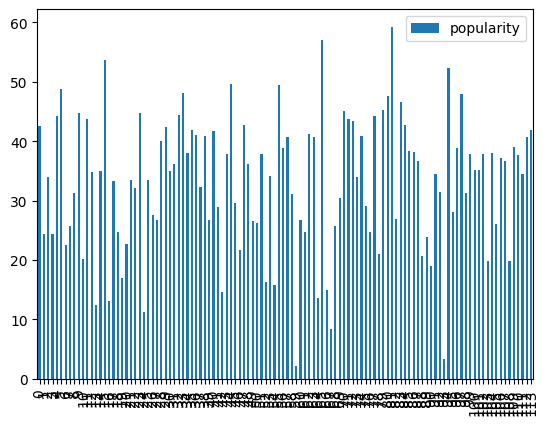

In [21]:
group = data.groupby(["track_genre"], as_index=False).agg({"popularity": "mean"})
group.plot.bar()

Получилось не очень информативно, сократим количество выводимых жанров.

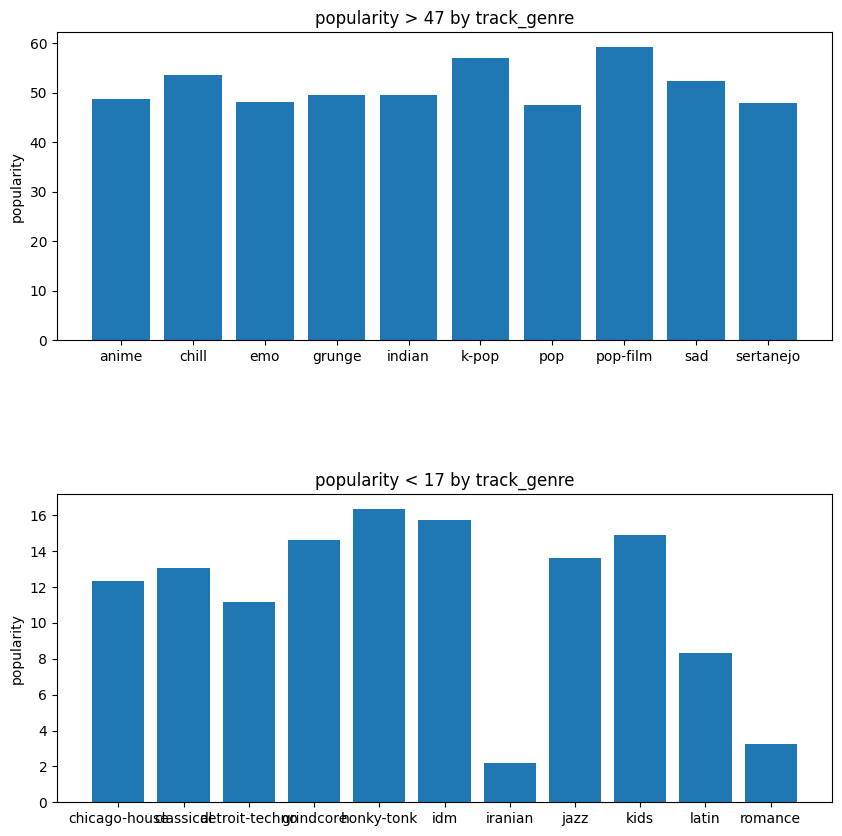

In [22]:
group = data.groupby(["track_genre"], as_index=False).agg({"popularity": "mean"})
groups_queries = ("popularity > 47", "popularity < 17")
groups = (group.query(query) for query in groups_queries) 

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for ax, gr, info in zip(axes, groups, groups_queries):
    ax.bar(gr["track_genre"], gr["popularity"])

    ax.set_ylabel('popularity')
    ax.set_title(f'{info} by track_genre')

plt.show()

#### Вывод:

Наиболее популярные жанры k-pop, pop-film и другие, представленные на графике

**Наименее популярные жанры iranian, romance**

Когда считал значения, заметил, что в каждом жанре ровно 1000 треков

### Может песни с explicit пользуются наибольшей популярностью?

<Axes: title={'center': 'Frequency by explicit'}, xlabel='explicit'>

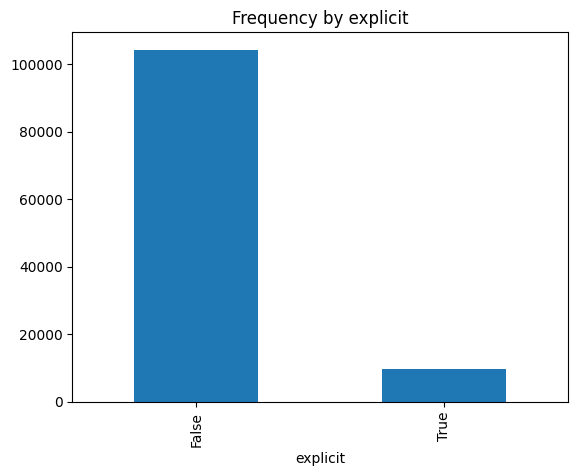

In [23]:
plt.title("Frequency by explicit")
data['explicit'].value_counts().plot.bar()

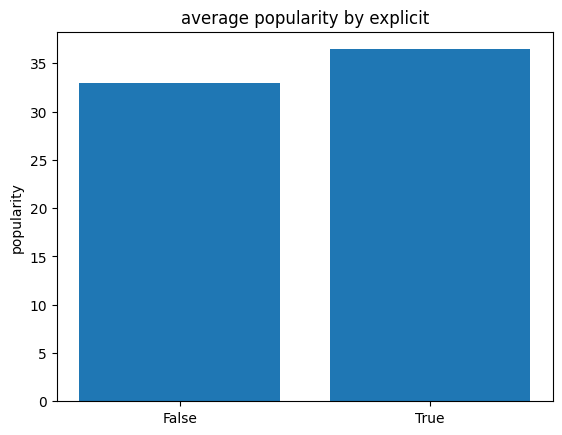

In [24]:
group = data.groupby(['explicit'], as_index=False).agg({'popularity': 'mean'})

fig, ax = plt.subplots()

ax.bar(group['explicit'], group['popularity'])
ax.set_ylabel('popularity')
ax.set_title('average popularity by explicit')
ax.set_xticks([0, 1])
ax.set_xticklabels(group['explicit'])
    
plt.show()

#### Вывод: несмотря на куда меньшее количество, треки с explicit пользуются большей популярностью, хотя отрыв небольшой

### Посмотрим как продолжительность влияет на популярность

In [25]:
data['duration_sec'] = data['duration_ms'] / 1000
data['duration_min'] = data['duration_sec'] / 60

In [26]:
data.drop(columns=['duration_ms', 'duration_sec'], inplace=True)

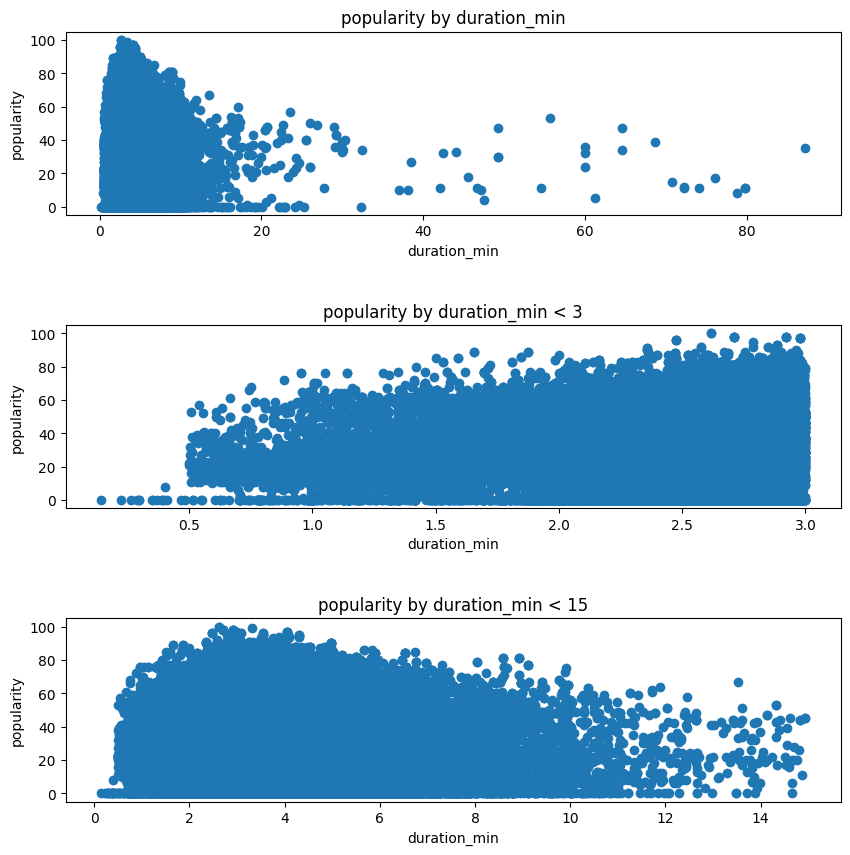

In [27]:
groups = {
    "duration_min": data,
    "duration_min < 3": data.query("duration_min < 3"),
    "duration_min < 15": data.query("duration_min < 15"),
}

fig, axes = plt.subplots(len(groups), 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.6)

for ax, (query, gr) in zip(axes, groups.items()):
    ax.scatter(gr["duration_min"], gr["popularity"])
    ax.set_xlabel("duration_min")
    ax.set_ylabel("popularity")
    ax.set_title(f"popularity by {query}")

plt.show()

#### Выводы:

Пиковая популярность приходится на треки от 2 до 4 минут, потом начинает спадать

**Треки длящиеся меньше чем пол минуты имеют минимальную популярность**

### Как danceability влияет на популярность?

In [28]:
data['danceability'].sort_values().unique()

array([0.    , 0.0513, 0.0532, ..., 0.983 , 0.984 , 0.985 ])

В danceability находятся значения от 0 до 1

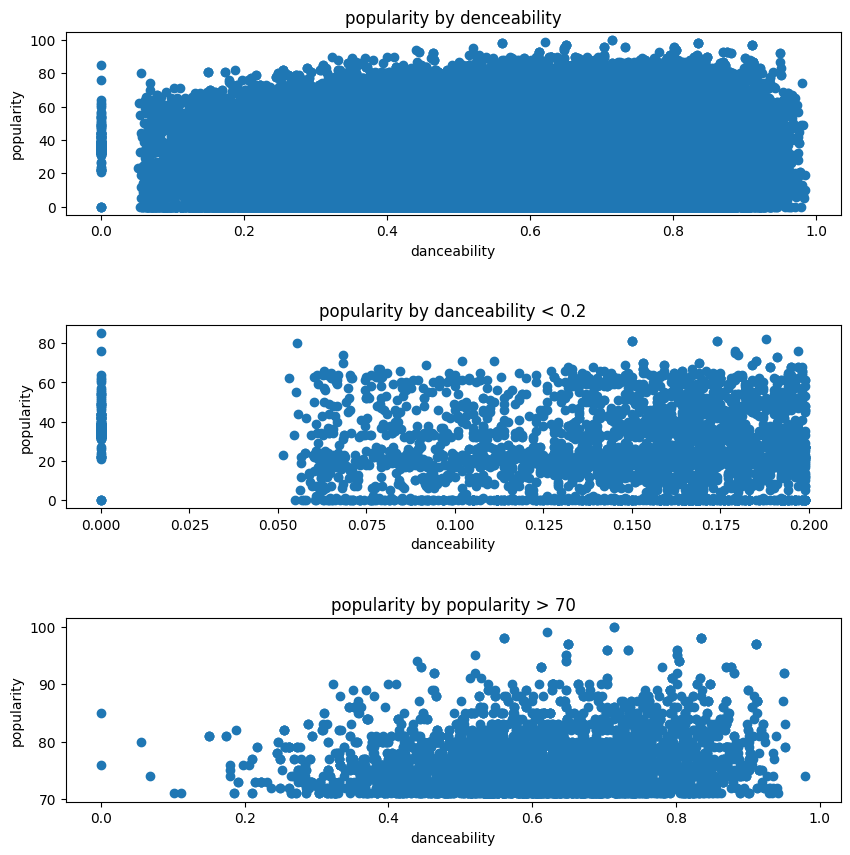

In [29]:
groups = {
    "denceability": data,
    "danceability < 0.2": data.query("danceability < 0.2"),
    "popularity > 70": data.query("popularity > 70"),
}

fig, axes = plt.subplots(len(groups), 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.6)

for ax, (query, gr) in zip(axes, groups.items()):
    ax.scatter(gr["danceability"], gr["popularity"])
    ax.set_xlabel("danceability")
    ax.set_ylabel("popularity")
    ax.set_title(f"popularity by {query}")

plt.show()

Интересно почему danceability между 0 и 0.05 нет ни одного значения

При danceability = 0 довольно много точек

#### Каково будет распределение в зависимости от популярности при danceability близком к 0?

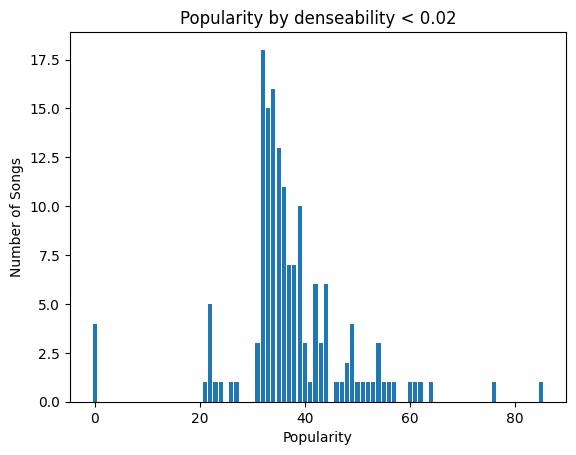

In [30]:
dt = data.loc[data['danceability'] < 0.02]
popularity_counts = dt['popularity'].value_counts().sort_index()

fig, ax = plt.subplots()

ax.bar(popularity_counts.index, popularity_counts.values)
ax.set_xlabel("Popularity")
ax.set_ylabel("Number of Songs")
ax.set_title("Popularity by denseability < 0.02")

plt.show()

#### Выводы:

**При danceability = 0 популярность трека с большой вероятностью будет находится от 30 до 40**

Треки с наибольшей популярностью в основном имеют danceability от 0.4 до 0.9

### Расмотрим колонку tempo

In [31]:
data['tempo'].sort_values().unique()

array([  0.   ,  30.2  ,  30.322, ..., 220.525, 222.605, 243.372])

In [32]:
data["tempo"] = data["tempo"].round().astype("int")

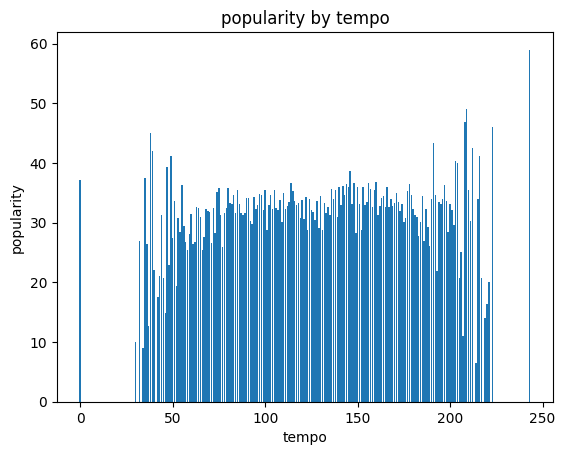

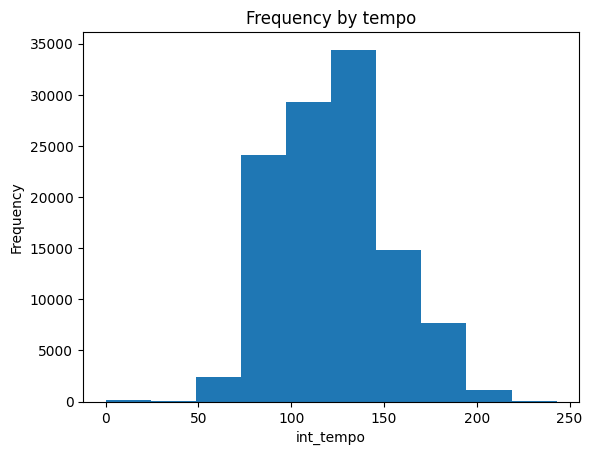

In [33]:
group = data.groupby(["tempo"], as_index=False).agg({"popularity": "mean"})

fig, ax = plt.subplots()

ax.bar(group["tempo"], group["popularity"])
ax.set_xlabel("tempo")
ax.set_ylabel("popularity")
ax.set_title(f"popularity by tempo")

plt.show()


data["tempo"].plot.hist()

plt.title("Frequency by tempo")
plt.xlabel("int_tempo")
plt.ylabel("Frequency")

plt.show()

#### Выводы:

Больше всего количество треков с tempo от 75 до 160

### Как колонка key влияет на популярность?

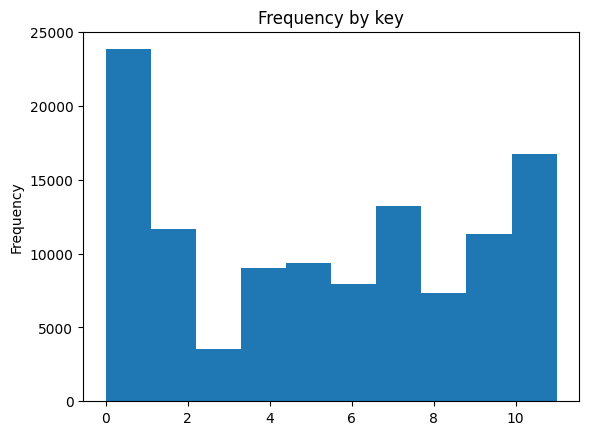

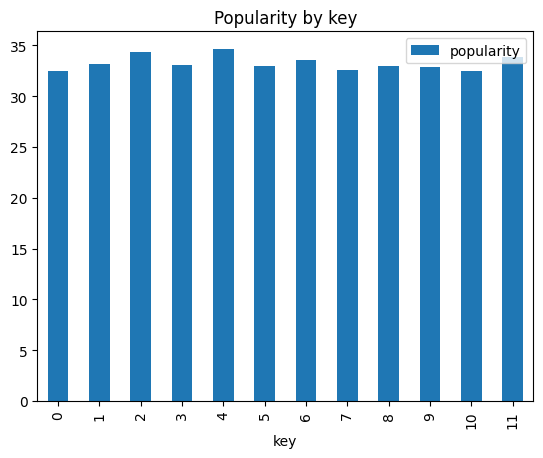

In [34]:
data['key'].plot.hist()
plt.title("Frequency by key")
plt.show()

data.groupby("key").agg({"popularity": "mean"}).plot.bar()
plt.title("Popularity by key")
plt.show()

Вывод: неочевидно, стоит попробовать обучить модель с этой колонкой и без нее

## Выводы по аналитике:

* Пиковая популярность приходится на треки от 2 до 4 минут, потом начинает спадать
* Треки длящиеся меньше чем пол минуты имеют минимальную популярность
* Наименее популярные жанры iranian, romance, наиболее популярные k-pop, pop-film
* При danceability = 0 популярность трека с большой вероятностью будет находится от 30 до 40

## Фича инженеринг

### Посчитаем количество треков по каждому исполнителю

У каждого трека исполнители перечислены через ;

In [35]:
artists = (
    data.groupby(["artists"], as_index=False)
    .agg({"track_id": "count"})
    .rename(columns={"track_id": "tracks_count"})
)

artists["artists"] = artists["artists"].str.split(";")

artists = (
    artists.explode("artists")
    .groupby(["artists"], as_index=False)
    .agg({"tracks_count": "sum"})
    .rename(columns={"artists": "artist"})
)

# Для быстрого поиска кастуем к dict
artist_track_count = artists.set_index("artist")["tracks_count"].to_dict()

Функция для подсчета среднего кол-ва треков созданных исполнителями какого либо трека

In [36]:
def average_tracks_by_artists(artists: str):
    avg = 0
    artists_list = artists.split(";")
    for artist in artists_list:
        avg += artist_track_count[artist]
    return avg / len(artists_list)

У трека может быть несколько исполнителей. Укажем для каждой записи среднее арифметическое числа треков созданных ее исполнителями

In [37]:
data['mean_tracks_count'] = data["artists"].apply(average_tracks_by_artists)

### У кого имя трека совпадает с именем альбома, пометим как true

In [38]:
data.loc[data["album_name"] == data["track_name"], "is_same_album"] = True
data["is_same_album"] = data["is_same_album"].fillna(False)

/tmp/ipykernel_17/2964774499.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["is_same_album"] = data["is_same_album"].fillna(False)


### Количество треков в альбоме

In [39]:
albums_count = (
    data.groupby(["album_name"], as_index=False)
    .agg({"track_id": "count"})
    .rename(columns={"track_id": "count_in_album"})
    .set_index("album_name")["count_in_album"]
    .to_dict()
)

data["count_in_album"] = data["album_name"].apply(lambda x: albums_count[x])

### Количество исполнителей в треке

In [40]:
data['count_artists'] = data["artists"].apply(lambda x: len(x.split(";")))

### Комбинации Громкости

В loudness записаны отрицательные значения, в energy и danceability от 0 до 1. Чтобы не получились очень маленькие цифры добавим к loudness 100, заодно уберем отрицательные числа.

In [41]:
data['loudness'].sort_values().unique()

array([-49.531, -49.307, -46.591, ...,   2.574,   3.156,   4.532])

#### (loudness + 100) * energy

In [42]:
data['loudness_energy'] = (data['loudness'] + 100) * data['energy']

#### (loudness + 100) * energy * danceability

In [43]:
data['loudness_energy_danceability'] = (data['loudness'] + 100) * data['energy'] * data['danceability']

### Danceability и продолжительность

В danceability значения очень маленькие(от 0 до 1), поэтому возьмем из него корень

In [44]:
data['dance_duration'] = data["danceability"] ** 0.5 * data["duration_min"]

### Если есть слово remix пометим как true

In [45]:
data["is_remix"] = data["track_name"].str.lower().str.contains("remix", na=False)

## Кодирование

In [46]:
data = data.drop(columns=['track_id'])

In [47]:
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
label_encoders = {}

In [48]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [49]:
data.isnull().sum()

artists                         0
album_name                      0
track_name                      0
popularity                      0
explicit                        0
danceability                    0
energy                          0
key                             0
loudness                        0
mode                            0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
tempo                           0
time_signature                  0
track_genre                     0
duration_min                    0
mean_tracks_count               0
is_same_album                   0
count_in_album                  0
count_artists                   0
loudness_energy                 0
loudness_energy_danceability    0
dance_duration                  0
is_remix                        0
dtype: int64

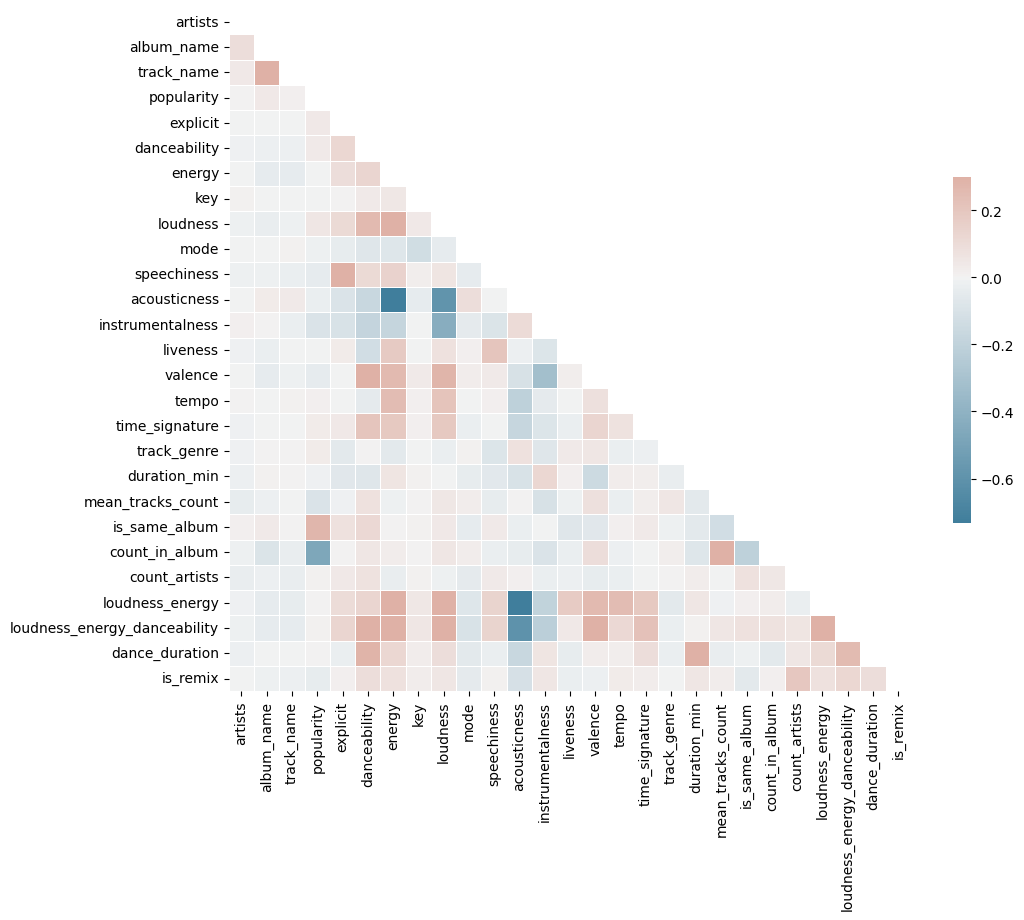

In [50]:
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

С таргетом все колонки слабо корелируют

По матреце кореляции видно, что колонки acousticness и energy а вместе с ними и созданные мной фичи сильно корелируют между собой

## Обучение

In [51]:
X = data.drop(columns=['popularity'])
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import Adam
from keras.regularizers import l2

#### Метапараметры

In [53]:
class Params:
    def lr_schedule(epoch, lr):
        return lr * 0.95**epoch

    
    @classmethod
    def get_optimizer(cls):
        return Adam(learning_rate=cls.learning_rate)

    
    learning_rate = 0.001
    scaler = StandardScaler()
    scheduler = LearningRateScheduler(lr_schedule)
    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    callbacks = [early_stopping, scheduler]
    loss = "mean_squared_error"
    epochs = 10
    batch_size = 32
    val_split = 0.2

In [54]:
scaler = Params.scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Оценка метрик

In [55]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

def print_metrics(model):
    # Прогнозирование на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mse ** 0.5

    print(f"\nMetrics for {model}: \n")
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape}')
    print(f'R2: {r2}')

In [56]:
def show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### Простая модель (64, 64, 1)

In [57]:
model = keras.Sequential(
    [
        keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1),
    ]
)

# Compile the model
model.compile(optimizer=Params.get_optimizer(), loss=Params.loss)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=Params.epochs,
    batch_size=Params.batch_size,
    validation_split=Params.val_split,
    callbacks=Params.callbacks
)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 491.4821 - val_loss: 313.7552 - learning_rate: 0.0010
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 308.0324 - val_loss: 299.7994 - learning_rate: 9.5000e-04
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 293.2753 - val_loss: 293.0520 - learning_rate: 8.5738e-04
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 285.8099 - val_loss: 287.4678 - learning_rate: 7.3509e-04
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 279.0446 - val_loss: 281.5842 - learning_rate: 5.9874e-04
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 278.1168 - val_loss: 279.9293 - learning_rate: 4.6329e-04
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 268.7224 - val_loss: 276.9780 - learning_rate: 3.4056e-04
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 267.8702 - val_loss: 274.6479 - learning_rate: 2.3783e-04
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step -

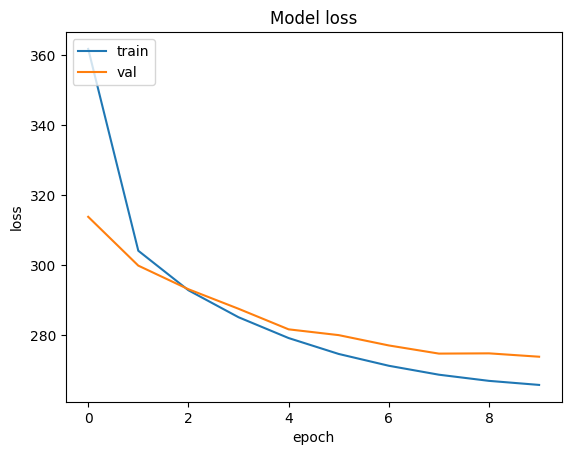

In [58]:
show_loss(history)

In [59]:
print_metrics(model)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Metrics for <Sequential name=sequential, built=True>: 

MAE: 12.641547586144062
RMSE: 16.43763015076615
MAPE: 7051600425460120.0
R2: 0.4553488848059205


### Важность признаков(permutation importance)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

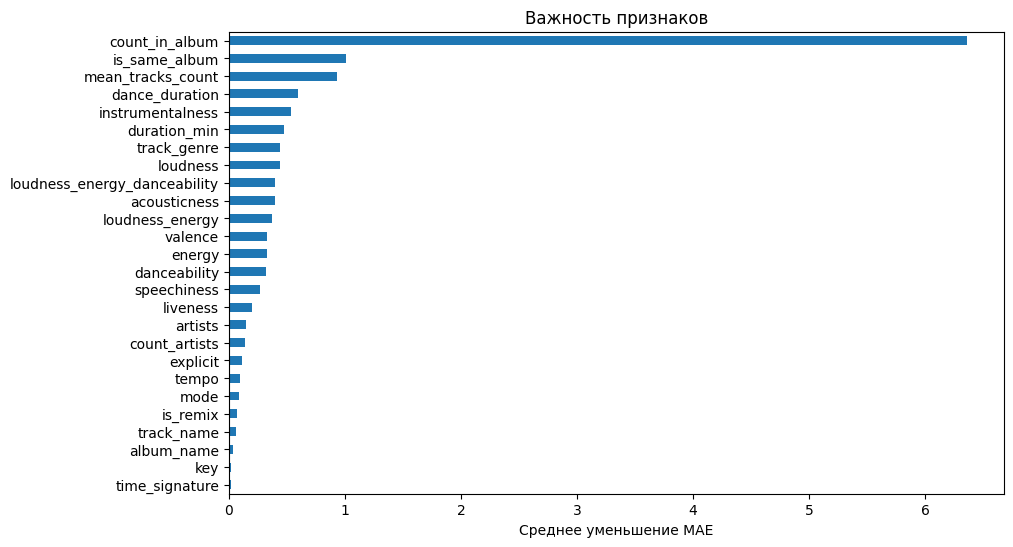

In [60]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Созданные мной новые фичи показали высокий вклад в предсказания модели особенно count_in_album.

Наименее важными фичами оказались time_signature, album_name, key

## Эксперименты с моделями

### Линейная

In [61]:
from sklearn import linear_model


reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

print("Linear Regression")
print("Coefficients: \n")
print(reg.coef_, reg.intercept_)
print_metrics(reg)

Linear Regression
Coefficients: 

[  0.03018313  -0.08684711  -0.19385985   0.85647709   1.95069949
 -12.24693451  -0.03624384  -0.53839243  -0.13108881  -1.93085759
  -1.07593019  -3.01495865   0.27128989  -1.14750632  -0.02014325
   0.19077569   0.64466565  -0.27009018   2.45324384   3.81009313
 -11.09374973   0.40683364  13.36242237  -1.93012752  -0.1730641
  -0.52569708] 33.298643625478356

Metrics for LinearRegression(): 

MAE: 15.3106893026687
RMSE: 18.73657404481493
MAPE: 1.3178689102825516e+16
R2: 0.2923469944527973


### Ближайшие соседи

In [62]:
from sklearn.neighbors import KNeighborsRegressor


neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)

print_metrics(neigh)


Metrics for KNeighborsRegressor(): 

MAE: 11.774640350877196
RMSE: 16.175381716800707
MAPE: 5991288704278550.0
R2: 0.47258914436830457


### Дерево решений

In [63]:
from sklearn import tree


clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

print_metrics(clf)


Metrics for DecisionTreeRegressor(): 

MAE: 8.757061403508771
RMSE: 15.14933919582552
MAPE: 1749391671044157.8
R2: 0.5373768436270826


### Градиентный бустинг

In [64]:
from sklearn.ensemble import GradientBoostingRegressor


reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

print_metrics(reg)


Metrics for GradientBoostingRegressor(random_state=42): 

MAE: 12.126221057597304
RMSE: 15.645262357507027
MAPE: 7097354083139287.0
R2: 0.5065925658282473


In [65]:
from sklearn.ensemble import HistGradientBoostingRegressor


reg = HistGradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

print_metrics(reg)


Metrics for HistGradientBoostingRegressor(random_state=42): 

MAE: 9.621499560489235
RMSE: 12.99182369249658
MAPE: 5091725178867373.0
R2: 0.6597640307324713


### Случаный лес

In [66]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

print_metrics(reg)


Metrics for RandomForestRegressor(random_state=42): 

MAE: 7.1575603132832075
RMSE: 10.492644062609438
MAPE: 2449284486815218.0
R2: 0.7780731394083427


### Нейронные сети

Убрал вывод при обучении verbose=0

In [67]:
def train_model(model):
    model.compile(optimizer=Params.get_optimizer(), loss=Params.loss)

    history = model.fit(
        X_train,
        y_train,
        epochs=Params.epochs,
        batch_size=Params.batch_size,
        validation_split=Params.val_split,
        callbacks=Params.callbacks,
        verbose=0
    )

    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}")

    print_metrics(model)
    show_loss(history)

In [68]:
Params.epochs = 50

#### Эксперименты

Начал увеличивать количество слоев и нейронов

По сравнению с (64, 64, 1) добавил и поменял:

    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 231.2349
Test Loss: 231.07643127441406
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Metrics for <Sequential name=sequential_1, built=True>: 

MAE: 11.27540121301355
RMSE: 15.201197400771099
MAPE: 5278416836560826.0
R2: 0.534204181373324


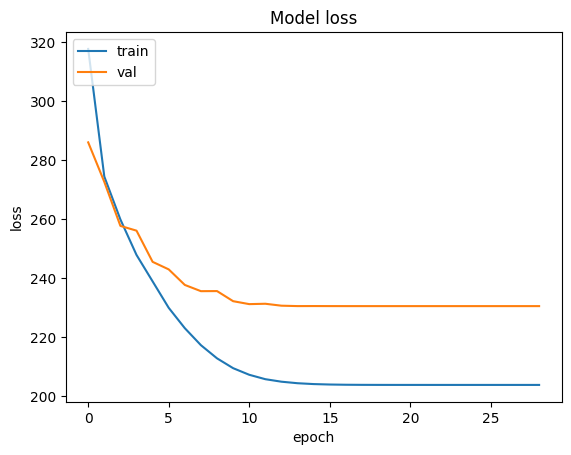

In [69]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1),
    ]
)

train_model(model)

Добавил еще два слоя:
    
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(512, activation="relu"),

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 298.3713
Test Loss: 292.91845703125
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Metrics for <Sequential name=sequential_2, built=True>: 

MAE: 13.23053707801982
RMSE: 17.114862827177504
MAPE: 7989276884784584.0
R2: 0.40954496064726864


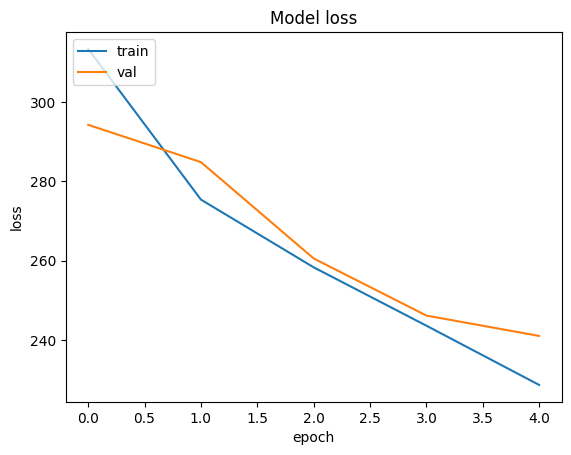

In [70]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1),
    ]
)

train_model(model)

Добавил самый большой слой(2048), время обучения очень увеличилось, точность нет

        keras.layers.Dense(2048, activation="relu"),

713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 286.2660
Test Loss: 281.1494445800781
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step

Metrics for <Sequential name=sequential_3, built=True>: 

MAE: 12.721221568492943
RMSE: 16.767511220931734
MAPE: 6626604385355165.0
R2: 0.43326869936357526


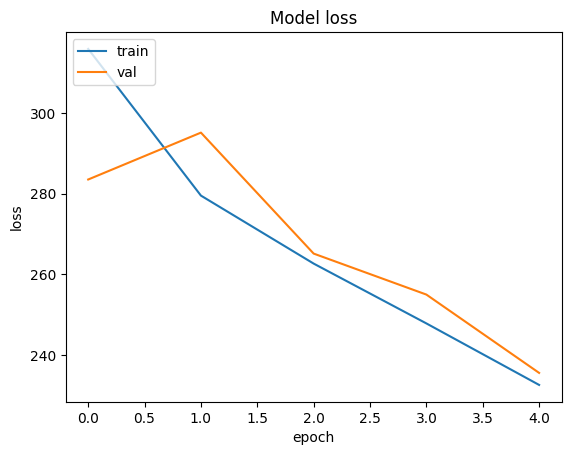

In [71]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(2048, activation="relu"),
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1),
    ]
)

train_model(model)

Добавил Dropout и l2 регуляризацию, точность уменьшилась

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 318.3504
Test Loss: 312.4629821777344
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Metrics for <Sequential name=sequential_4, built=True>: 

MAE: 13.358634136230277
RMSE: 17.449353270175262
MAPE: 6358317409058942.0
R2: 0.3862398905499409


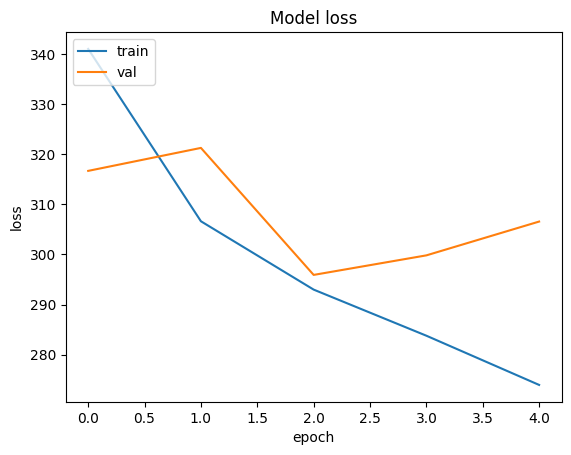

In [72]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(1024, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(512, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dense(1),
    ]
)


train_model(model)

Перешел от слоев с большим количеством нейронов к слоям по меньше, но буду увеливать количество слоев

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 310.1103
Test Loss: 304.8778381347656
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Metrics for <Sequential name=sequential_5, built=True>: 

MAE: 13.092983207564082
RMSE: 17.29067887990272
MAPE: 6541335870477228.0
R2: 0.3973515018902546


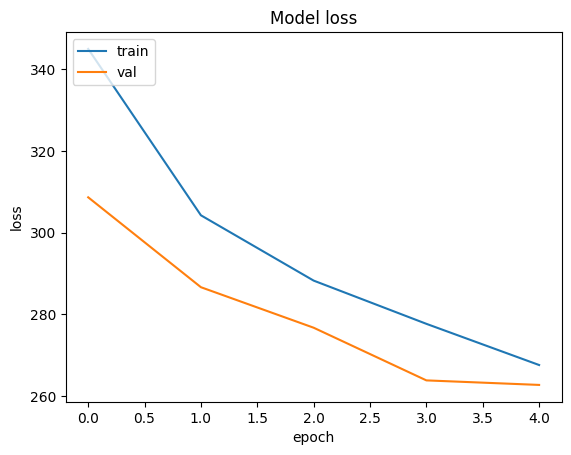

In [73]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(512, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dense(1),
    ]
)

train_model(model)

Еще увеличил количество слоев, точность не поменялась

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 295.2303
Test Loss: 291.79254150390625
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Metrics for <Sequential name=sequential_6, built=True>: 

MAE: 12.908513588382487
RMSE: 16.97722168601637
MAPE: 6431962919299536.0
R2: 0.41900388623972007


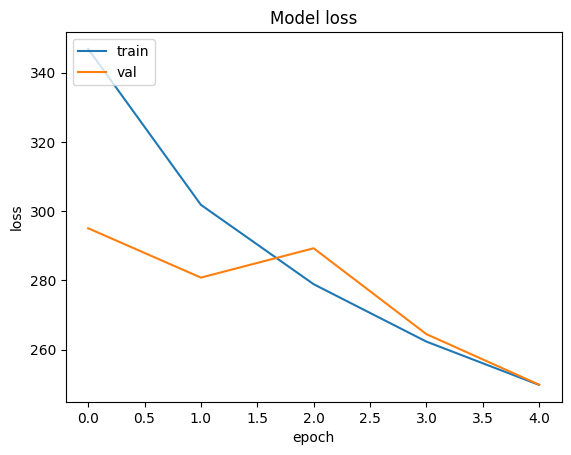

In [74]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(512, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1),
    ]
)

train_model(model)

Еще добавил пару слой 128 и поменял их порядок

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 367.3105
Test Loss: 361.5186767578125
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Metrics for <Sequential name=sequential_7, built=True>: 

MAE: 14.457696637856333
RMSE: 18.81860513804761
MAPE: 6061774375437058.0
R2: 0.28613704126988637


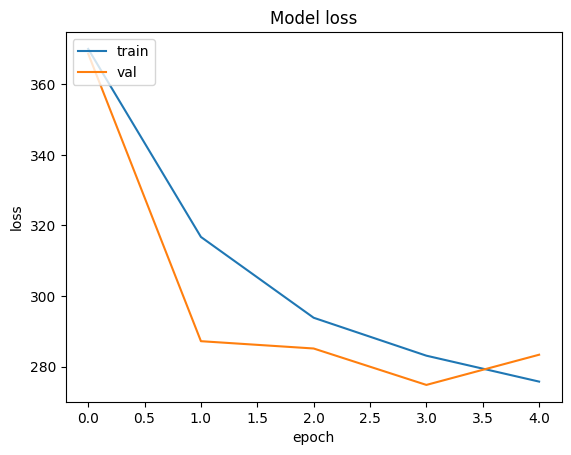

In [75]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(512, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        keras.layers.Dense(1),
    ]
)

train_model(model)

**Не все эксперименты попали в ноутбук**

### Вывод из экспериментов

Лучше всех себя показали:
1. RandomForestRegressor
2. HistGradientBoostingRegressor
3. DecisionTreeRegressor

## Кросс валидация

Будем проводить ее для RandomForestRegressor

In [76]:
class Metrics_collector:
    def __init__(self, model):
        self.model = model
        self.mae_list = []
        self.rmse_list = []
        self.mape_list = []
        self.r2_list = []


        self.metrics = dict(zip(
            ["MAE", "RMSE", "MAPE", "R2"],
            (self.mae_list, self.rmse_list, self.mape_list, self.r2_list),
        ))

    def collect_metrics_cross_val(self, X_val, y_val):
        y_pred = self.model.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse**0.5
        mape = mean_absolute_percentage_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        self.mae_list.append(mae)
        self.rmse_list.append(rmse)
        self.mape_list.append(mape)
        self.r2_list.append(r2)

    def show(self):
        fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 9))
        fig.suptitle("Metrics by cross-validation folds")
        fig.subplots_adjust(hspace=0.4)
        axes = axes.flatten()

        for ax, (label, metric) in zip(axes, self.metrics.items()):
            ax.plot(metric, label=label)
            ax.set_xlabel("Fold")
            ax.set_title(f"{label}")

        plt.show()

In [77]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor


kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = RandomForestRegressor(random_state=42, n_jobs=-1)
metrics = Metrics_collector(reg)

for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    reg.fit(X_train_fold, y_train_fold)
    metrics.collect_metrics_cross_val(X_val_fold, y_val_fold)

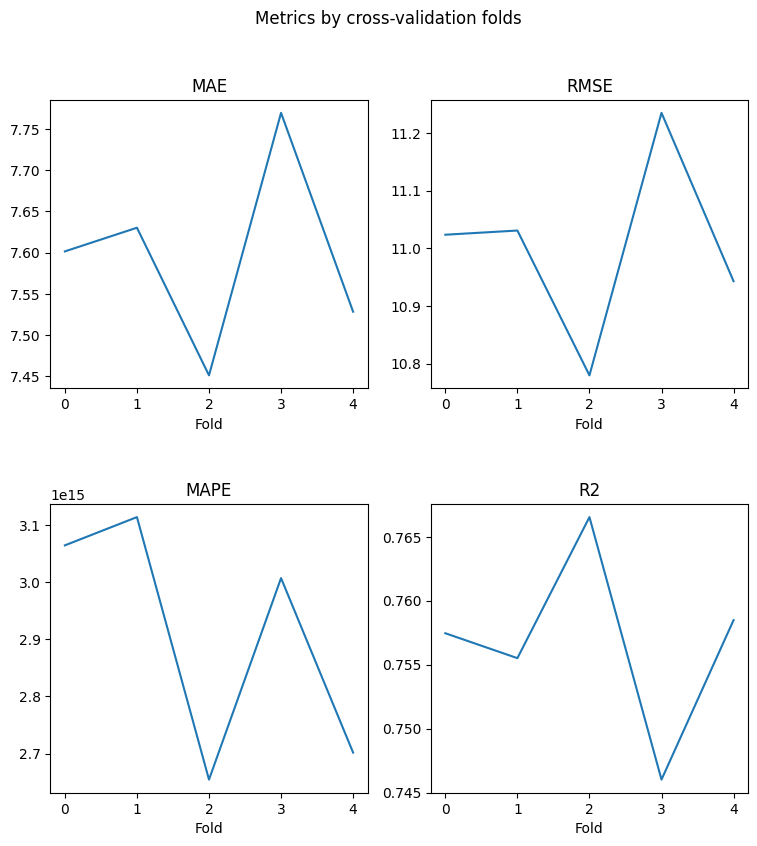

Точность на тестовых данных после кросс валидации

Metrics for RandomForestRegressor(n_jobs=-1, random_state=42): 

MAE: 7.469454218358396
RMSE: 10.8351636350231
MAPE: 2695272892659414.5
R2: 0.7633475869355304


In [78]:
metrics.show()
print("Точность на тестовых данных после кросс валидации")
print_metrics(reg)

## Вывод

Модель в среднем ошибается на 7.5 едениц популярности(MAE), а более сильные отклонения в среднем составляют 11 едениц(как показала RMSE)

Средняя абсолютная ошибка в процентах показывает аномально большое значение. Не могу сказать, почему это происходит.

R2 равен 0.76, что можно считать хорошим показателем.

**Если сравнить точность до кросс валидации и после, то они практически одинаковые**